# Import libraries

In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snsُُ
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
# Decomposition
from math import copysign, hypot
import time


# Data preprocessing

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Model prepration
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


In [ ]:
#check for imbalanceness
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

In [ ]:
#Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply logistic regression for prediction

confussion matrix:




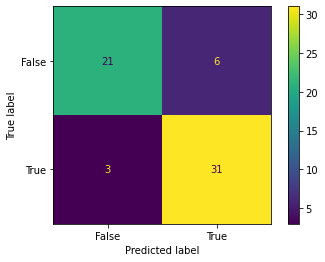



Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
#Apply Losistic Regression model
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix:")
print("\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

# QR Decomposition Functions

## Gram Schmidt

In [ ]:
def gram_schmidt_process(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j - 1):
            q = Q[:, i]
            R[i, j] = q.dot(v)
            v = v - R[i, j] * q

        norm = np.linalg.norm(v)
        Q[:, j] = v / norm
        R[j, j] = norm
    return Q, R

## Gram Schmidt Test

In [ ]:
# Compute QR decomposition using Gram Schmidt
(Q, R) = gram_schmidt_process(X_train)

# Print orthogonal matrix Q
print('\n Q is: \n', Q)

# Print upper triangular matrix R
print('\n R is: \n', R)


 Q is: 
 [[-0.0853499  -0.09233632  0.05700906 ... -0.07376818  0.00676252
   0.00719933]
 [ 0.0802908  -0.09233632  0.06972005 ... -0.05116278  0.03330044
   0.00093446]
 [ 0.02267665  0.04475196  0.06529884 ...  0.06053865 -0.06121312
  -0.00418841]
 ...
 [ 0.00827311  0.04475196  0.12571833 ... -0.06177094 -0.04470273
   0.08953141]
 [-0.05654282  0.04475196  0.05921967 ...  0.06147842 -0.02417394
  -0.02547766]
 [ 0.02267665  0.04475196  0.00377405 ... -0.06743023 -0.06648789
  -0.04230813]]

 R is: 
 [[15.55634919  0.         -1.19026896  3.81477031  3.49894954  2.13219252
  -1.07364966 -6.1869868   1.13011277  2.57516426 -2.56588253  4.26553842
   0.71058883]
 [ 0.         15.55634919  0.         -0.75521421 -2.39590462  0.53760161
  -1.38003767 -1.39939573  2.87441357  2.00186471 -1.11468765  2.55577727
   3.13335615]
 [ 0.          0.         15.51074659  0.         -0.62951031  1.79184302
  -0.04844076  4.11847481 -6.26411074 -1.95392714  1.53999677 -2.42779065
  -2.45305866]

confussion matrix:




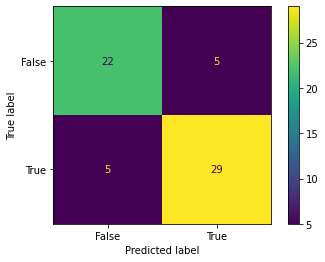



Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
#Apply Losistic Regression model
m2 = 'Logistic Regression with gram schmit'
lr = LogisticRegression()
model = lr.fit(Q, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix:")
print("\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

## Givens Rotation

In [ ]:
def givens_rotation(A):
    """
    QR-decomposition of rectangular matrix A using the Givens rotation method.
    """

    # Initialization of the orthogonal matrix Q and the upper triangular matrix R
    n, m = A.shape
    Q = np.eye(n)
    R = np.copy(A)

    rows, cols = np.tril_indices(n, -1, m)
    for (row, col) in zip(rows, cols):
        # If the subdiagonal element is nonzero, then compute the nonzero
        # components of the rotation matrix
        if R[row, col] != 0:
            r = np.sqrt(R[col, col]**2 + R[row, col]**2)
            c, s = R[col, col]/r, -R[row, col]/r

            # The rotation matrix is highly discharged, so it makes no sense
            # to calculate the total matrix product
            R[col], R[row] = R[col]*c + R[row]*(-s), R[col]*s + R[row]*c
            Q[:, col], Q[:, row] = Q[:, col]*c + Q[:, row]*(-s), Q[:, col]*s + Q[:, row]*c

    return Q[:, :m], R[:m]

## Givens Rotation test


In [ ]:
# Compute QR decomposition using Givens rotation
(Q, R) = givens_rotation(X_train)

# Print orthogonal matrix Q
print('\n Q is: \n', Q)

# Print upper triangular matrix R
print('\n R is: \n', R)


 Q is: 
 [[-0.0853499  -0.10295669  0.04956401 ... -0.09608529  0.01741921
   0.00948583]
 [ 0.0802908  -0.08356883  0.06374078 ... -0.0932802   0.04091995
  -0.00130726]
 [ 0.02267665  0.04771172  0.06899855 ...  0.04726145 -0.06604627
  -0.00274579]
 ...
 [ 0.00827311  0.04602582  0.12945798 ... -0.02758422 -0.04137257
   0.09078838]
 [-0.05654282  0.03843927  0.06221835 ...  0.03566405 -0.02783619
  -0.02080364]
 [ 0.02267665  0.04771172  0.00730635 ... -0.04056069 -0.06356453
  -0.04201296]]

 R is: 
 [[ 1.55563492e+01 -1.80848862e+00 -1.19026896e+00  3.81477031e+00
   3.49894954e+00  2.13219252e+00 -1.07364966e+00 -6.18698680e+00
   1.13011277e+00  2.57516426e+00 -2.56588253e+00  4.26553842e+00
   7.10588828e-01]
 [-6.83187429e-17  1.54508695e+01 -1.14188249e+00 -7.60369894e-01
  -2.41226093e+00  5.41271700e-01 -1.38945888e+00 -1.40894909e+00
   2.89403655e+00  2.01553100e+00 -1.12229737e+00  2.57322500e+00
   3.15474688e+00]
 [ 1.84971834e-16 -1.06001540e-17  1.54686575e+01  5.4

confussion matrix:




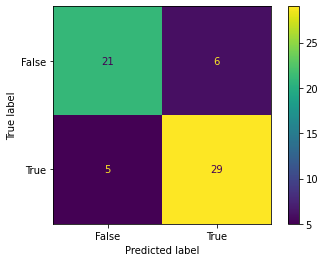



Accuracy of Logistic Regression: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
#Apply Losistic Regression model
m3 = 'Logistic Regression with Givens Rotation'
lr = LogisticRegression()
model = lr.fit(Q, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix:")
print("\n")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

## Runtime Analysis

In [ ]:
np.set_printoptions(precision=4, suppress=True)
A = np.random.standard_normal(size=(100, 100))

#runtime without QR
start_time = time.time()
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print('without QR decomposition runtime:',round((time.time() - start_time),2),'s')

#runtime with Gram schmidt
start_time = time.time()
(Q, R) = gram_schmidt_process(X_train)
lr = LogisticRegression()
model = lr.fit(Q, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print('gram_schmidt_process algortithm runtime:',round((time.time() - start_time),2),'s')

#runtime with Given rotation
start_time = time.time()
(Q, R) = givens_rotation(X_train)
lr = LogisticRegression()
model = lr.fit(Q, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print('givens_rotation algortithm runtime:',round((time.time() - start_time),2),'s')

without QR decomposition runtime: 0.03 s
gram_schmidt_process algortithm runtime: 0.01 s
givens_rotation algortithm runtime: 0.16 s


In [ ]:
import pandas as pd
conclusion = pd.DataFrame([[85.24 ,83.60 ,81.96],
              [6 ,5 ,6],
              [3 ,5 ,5],
              ['0.0.3 s' ,'0.01 s' ,'0.16 s']],
              index=['Accuracy', "FP", "FN", "runtime"],
              columns=['without using QR', 'Gram schmidt', 'Givens Rotation'])
conclusion


,without using QR,Gram schmidt,Givens Rotation
Accuracy,85.24,83.6,81.96
FP,6,5,6
FN,3,5,5
runtime,0.0.3 s,0.01 s,0.16 s
